In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ML 2/Body Performance/bodyPerformance.csv'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(file_path)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


**No missing values**

In [ ]:
df.isna().sum()

,0
age,0
gender,0
height_cm,0
weight_kg,0
body fat_%,0
diastolic,0
systolic,0
gripForce,0
sit and bend forward_cm,0
sit-ups counts,0


**Data types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [ ]:
df['gender'] = df['gender'].astype('category')

In [ ]:
# Check unique values in gender column
unique_gender = df['gender'].unique()
print(unique_gender)

['M', 'F']
Categories (2, object): ['F', 'M']


In [ ]:
df['class'] = df['class'].astype('category')

In [ ]:
# Check unique values in class column
unique_classes = df['class'].unique()
print(unique_classes)

['C', 'A', 'B', 'D']
Categories (4, object): ['A', 'B', 'C', 'D']


**Duplicates**

In [ ]:
df.duplicated().sum()

1

In [ ]:
#remove duplicate
print(f'with duplicates:{df.shape}')
df.drop_duplicates(inplace=True)
print(f'without duplicates:{df.shape}')

with duplicates:(13393, 12)
without duplicates:(13392, 12)


**Response Variable**

In [ ]:
# Count the number of occurrences in each class
class_counts = df['class'].value_counts()

# Display the counts
print(class_counts)

class
C    3349
D    3349
A    3347
B    3347
Name: count, dtype: int64


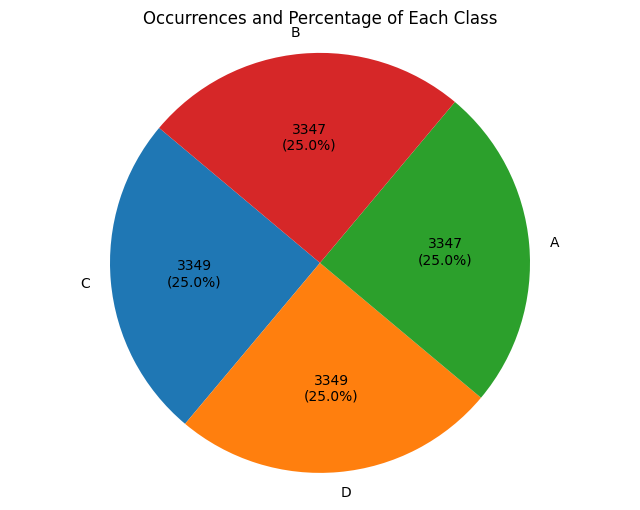

In [ ]:
import matplotlib.pyplot as plt

# Count the number of occurrences in each class
class_counts = df['class'].value_counts()

# Create a function to display both count and percentage
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f'{absolute}\n({pct:.1f}%)'

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct=lambda pct: func(pct, class_counts), startangle=140)
plt.title('Occurrences and Percentage of Each Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

**Gender**

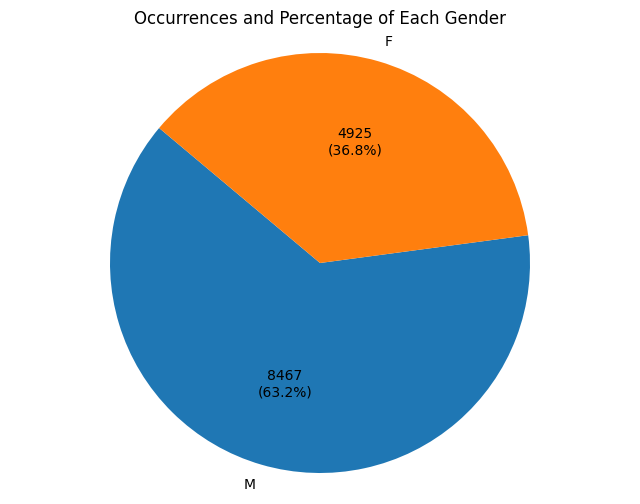

In [ ]:
# Count the number of occurrences for each gender
gender_counts = df['gender'].value_counts()

# Create a function to display both count and percentage
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f'{absolute}\n({pct:.1f}%)'

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda pct: func(pct, gender_counts), startangle=140)
plt.title('Occurrences and Percentage of Each Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

**Age**

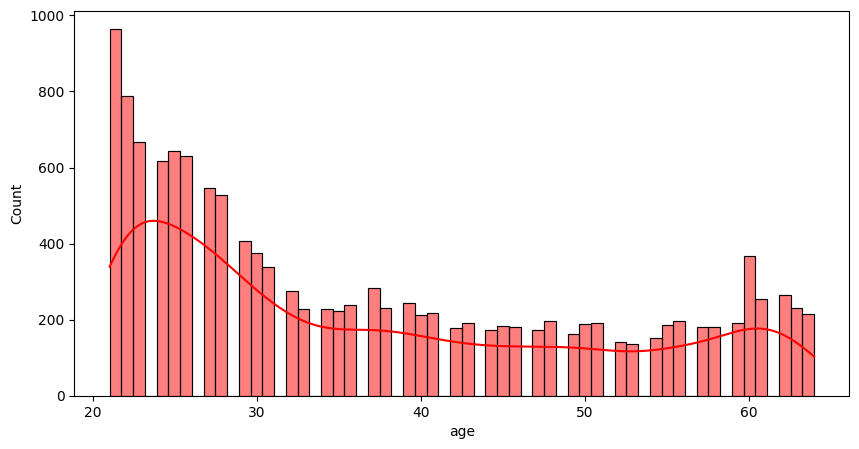

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="age", bins=60, kde=True, color='red')
plt.show()

In [ ]:
# Calculate min, max, and average
age_min = df['age'].min()
age_max = df['age'].max()
age_mean = df['age'].mean()

print(f"Minimum age: {age_min}")
print(f"Maximum age: {age_max}")
print(f"Average age: {age_mean:.2f}")  # rounded to 2 decimal places

Minimum age: 21.0
Maximum age: 64.0
Average age: 36.78


**Height**

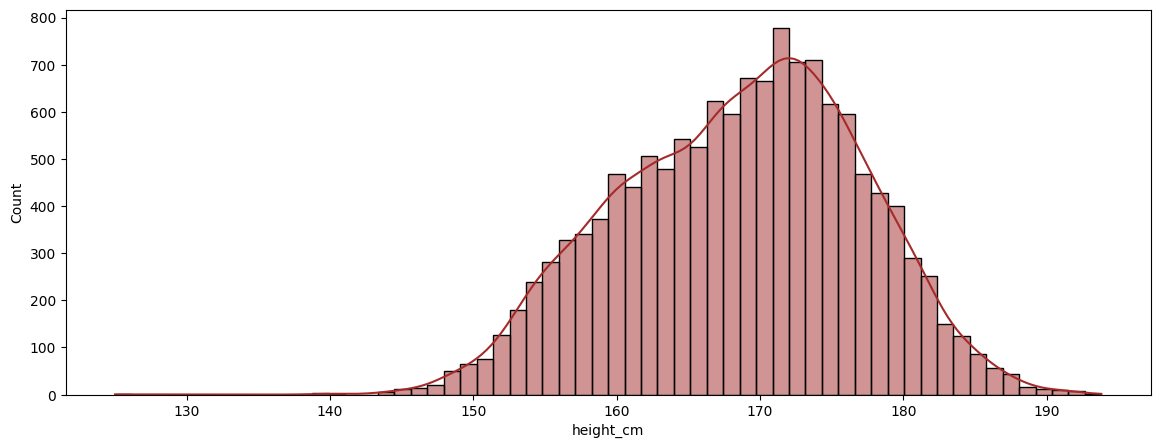

In [ ]:
plt.figure(figsize=(14, 5))
sns.histplot(data=df, x="height_cm", bins=60, kde=True, color='brown')
plt.show()

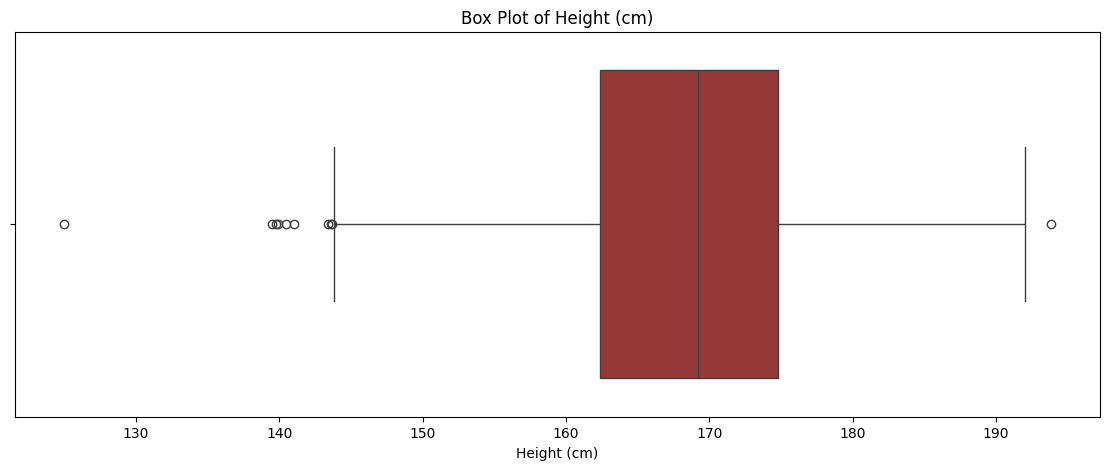

In [ ]:
# Set the figure size for height
plt.figure(figsize=(14, 5))

# Create a box plot for height
sns.boxplot(data=df, x="height_cm", color='brown')
plt.title('Box Plot of Height (cm)')
plt.xlabel('Height (cm)')

# Show the plot
plt.show()

**Weight**

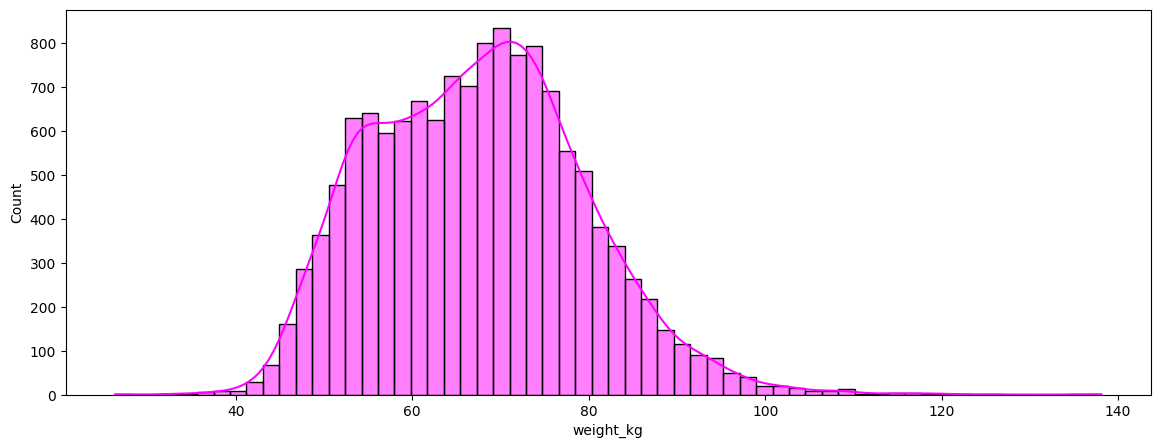

In [ ]:
plt.figure(figsize=(14, 5))
sns.histplot(data=df, x="weight_kg", bins=60, kde=True, color='magenta')
plt.show()

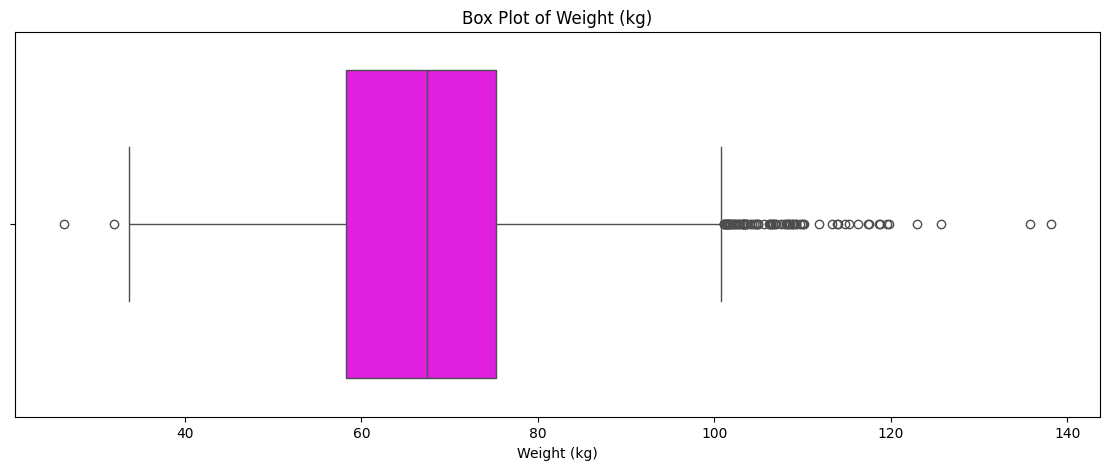

In [ ]:
# Set the figure size for weight
plt.figure(figsize=(14, 5))

# Create a box plot for weight
sns.boxplot(data=df, x="weight_kg", color='magenta')
plt.title('Box Plot of Weight (kg)')
plt.xlabel('Weight (kg)')

# Show the plot
plt.show()

**Body Fat %**

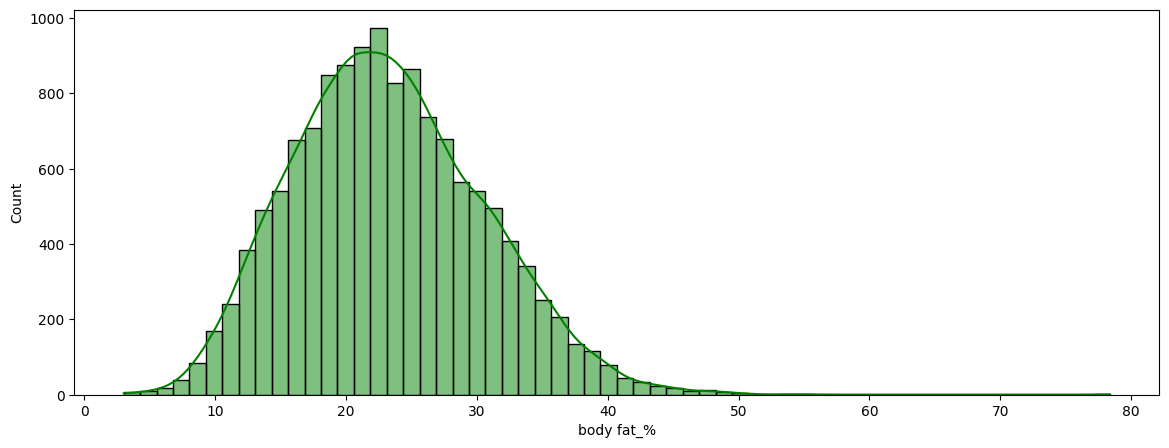

In [ ]:
plt.figure(figsize=(14, 5))
sns.histplot(data=df, x="body fat_%", bins=60, kde=True, color='green')
plt.show()

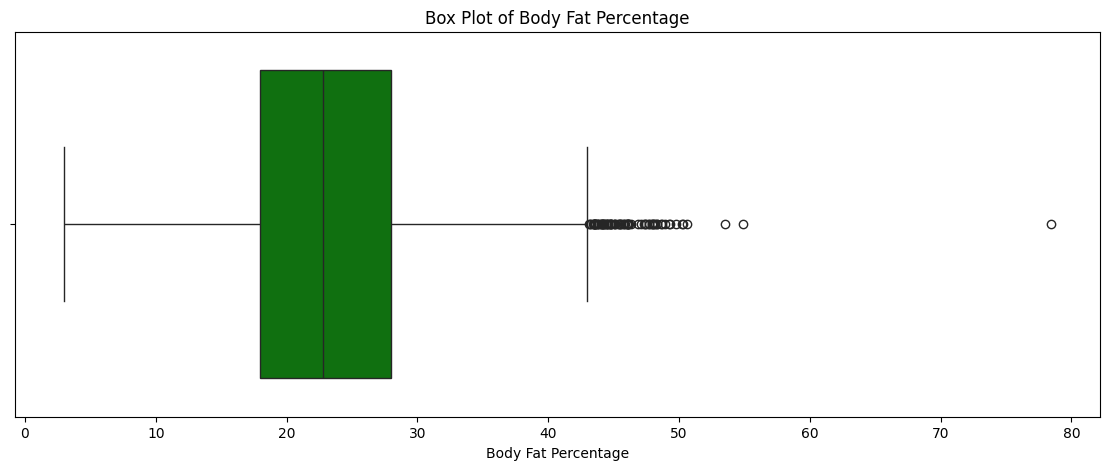

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=df, x="body fat_%", color='green')
plt.title('Box Plot of Body Fat Percentage')
plt.xlabel('Body Fat Percentage')

# Show the plot
plt.show()

In [ ]:
# Display records where 'body fat_%' is greater than 75
print(df[df['body fat_%'] > 75])

      age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
735  21.0      M      177.6       74.5        78.4       69.0     122.0   

     gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
735       44.9                     26.1            59.0          235.0     A  


The body fat percentage of 78.4% seems unrealistic for a 21-year-old male with the provided height and weight whose fitness level is good. Hence we will remove that

In [ ]:
# Remove records where 'body fat_%' is greater than 75
df1 = df[df['body fat_%'] < 75]

# Display the updated DataFrame
print(df1)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm cl

In [ ]:
# Check the size of df1
df1.shape

(13391, 12)

**Sit and bend forward_cm**

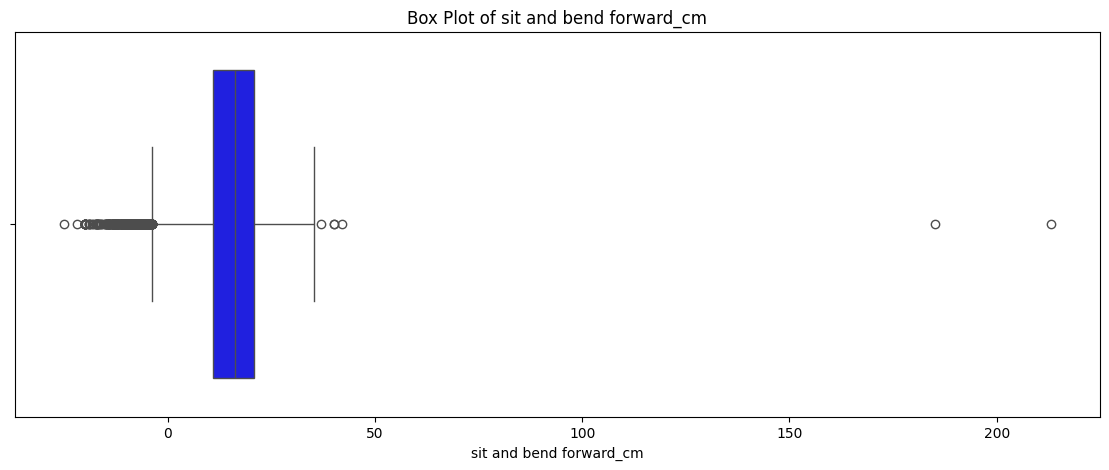

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=df1, x="sit and bend forward_cm", color='blue')
plt.title('Box Plot of sit and bend forward_cm')
plt.xlabel('sit and bend forward_cm')

# Show the plot
plt.show()

In [ ]:
# Filter the DataFrame for sit and bend forward values greater than height
outliers_df = df1[df1['sit and bend forward_cm'] > df1['height_cm']]

# Print the outliers for inspection
print(outliers_df)

       age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
2657  33.0      M      165.6       60.4        17.8       81.0     127.0   
3355  45.0      M      164.4       64.4        24.3       96.0     142.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
2657       38.6                    213.0            53.0          244.0     B  
3355       38.5                    185.0            44.0          223.0     A  


Two outliers can be seen from above which has unrealistic values

In [ ]:
# Display records where 'sit and bend forward_cm' is greater than or equal to 50
print(df1[df1['sit and bend forward_cm'] > 50])

       age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
2657  33.0      M      165.6       60.4        17.8       81.0     127.0   
3355  45.0      M      164.4       64.4        24.3       96.0     142.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
2657       38.6                    213.0            53.0          244.0     B  
3355       38.5                    185.0            44.0          223.0     A  


Remove those 2 records

In [ ]:
# Remove records where 'sit and bend forward_cm' is greater than or equal to 50
df2 = df1[df1['sit and bend forward_cm'] < 50]

# Display the updated DataFrame
print(df2)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm cl

In [ ]:
# Find records with negative values in the 'sit and bend forward_cm' column
negative_records = df2[df2['sit and bend forward_cm'] < 0]

# Display the negative records
print(negative_records)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
33     30.0      M      172.1      79.50    26.70000       91.0     148.0   
47     26.0      M      172.1      66.10    24.90000       62.0     102.0   
75     22.0      M      171.9      78.46    22.90000       64.0     116.0   
139    22.0      M      180.3      91.70    32.10000       75.0     134.0   
248    61.0      M      171.6      86.40    28.70000       70.0     142.0   
...     ...    ...        ...        ...         ...        ...       ...   
13280  26.0      M      173.5      68.70    15.16476       78.0     120.0   
13301  26.0      M      175.4      74.70    18.20000       93.0     150.0   
13318  25.0      M      187.9      94.90    19.40000       68.0     107.0   
13357  56.0      M      173.0      52.60    12.90000       92.0     141.0   
13380  42.0      M      172.0      76.30    32.80000      100.0     147.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm cl

The most logical measure is to use the level of the feet as recording zero, so that any measure that does not reach the toes is negative and any reach past the toes is positive
https://www.topendsports.com/testing/tests/sit-and-reach.htm

Hence we don't remove he negative values because they make sense

In [ ]:
# Check the size of df1
df2.shape

(13389, 12)

**Broad jump_cm**

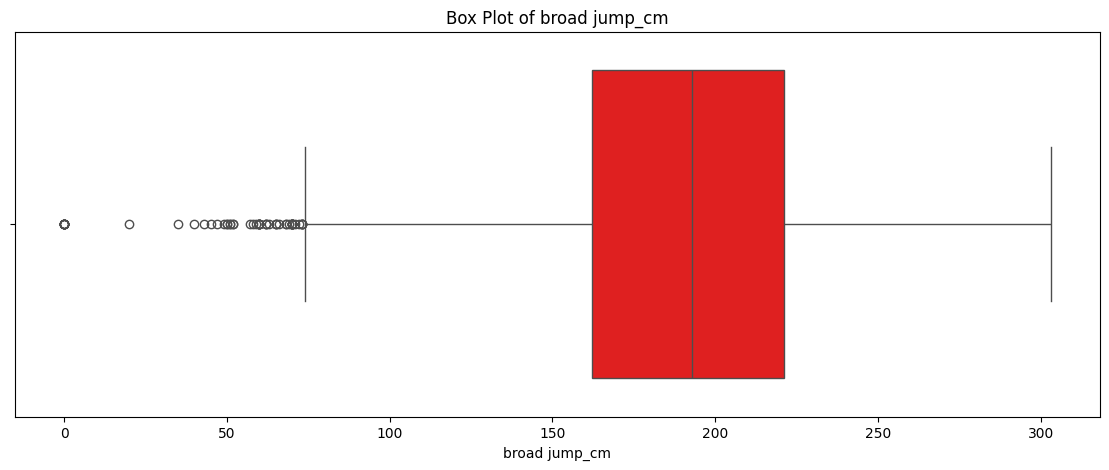

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=df2, x="broad jump_cm", color='red')
plt.title('Box Plot of broad jump_cm')
plt.xlabel('broad jump_cm')

# Show the plot
plt.show()

In [ ]:
# Display records where 'broad jump_cm' is equal to 0
print(df2[df2['broad jump_cm'] == 0])

       age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
484   22.0      F      167.4       66.2        34.0       62.0     110.0   
712   58.0      M      168.7       76.1        27.5       84.0     139.0   
1919  59.0      F      162.9       61.0        32.6       82.0     123.0   
4756  28.0      M      176.6       82.2        20.7       83.0     126.0   
4900  60.0      F      162.2       67.3        41.8       47.0     131.0   
7366  50.0      M      178.2       88.4        23.4       85.0     146.0   
7721  56.0      F      156.0       51.1        28.4       73.0     113.0   
7944  45.0      F      153.4       33.7        16.1       81.0     124.0   
7954  61.0      F      153.0       64.6        31.4       77.0     152.0   
8599  60.0      F      160.0       76.9        50.3       82.0     141.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
484        28.5                     11.2            38.0            0.0     C  
712

average	for males: 221-230cm
average for females: 171-180cm

while athletes can jump over 300cm as well.

College-aged males: The average Broad Jump distance for college-aged males is approximately 8-9 feet (2.4-2.7 meters).
College-aged females: The average Broad Jump distance for college-aged females is approximately 6-7 feet (1.8-2.1 meters).
High school athletes: The average Broad Jump distance for high school athletes is approximately 9-10 feet (2.7-3 meters) for males and 7-8 feet (2.1-2.4 meters) for females.
Professional basketball players: Professional basketball players have an average Broad Jump distance of 10-11 feet (3-3.4 meters).

Reference: https://www.matassessment.com/blog/broad-jump-test#:~:text=College%2Daged%20males%3A%20The%20average,(1.8%2D2.1%20meters).

But our dataset may contain people with disabilities.
It is possible for individuals with a broad jump of 0 or very less to still have reasonable scores in other tests (e.g., sit-ups and sit-and-bend-forward) as these tests may evaluate different aspects of fitness (e.g., flexibility).

HENCE WE WON'T REMOVE


**Systolic Rate**

In [ ]:
# Filter records where systolic is less than diastolic
invalid_records = df2[df2['systolic'] < df2['diastolic']]

# Display the invalid records
print(invalid_records)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
7495   30.0      F      156.2      52.80        28.2      156.2     104.0   
7597   30.0      M      166.6      66.08        14.4       67.0      14.0   
8217   31.0      M      176.7      80.32        20.8       46.2      43.9   
12949  24.0      M      171.0      78.70        20.0       99.0      95.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
7495        21.7                     27.2            43.0          162.0     C  
7597        53.8                     17.2            57.0          221.0     A  
8217        43.9                     17.2            57.0          221.0     B  
12949       46.5                     12.8            50.0          197.0     D  


The systolic rate is always expected to be higher than the diastolic rate. Hence we will remove them.

In [ ]:
# Remove records where systolic is less than diastolic
df3 = df2[df2['systolic'] >= df2['diastolic']]

# Display the cleaned DataFrame
print(df3)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm cl

In [ ]:
df3.shape

(13385, 12)

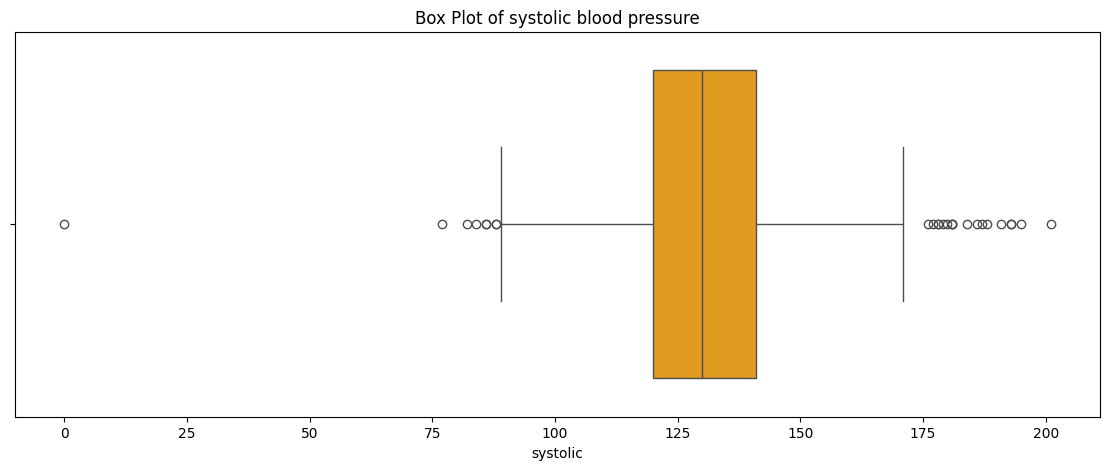

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=df3, x="systolic", color='orange')
plt.title('Box Plot of systolic blood pressure')
plt.xlabel('systolic')

# Show the plot
plt.show()

0mmHg seems not possible

Furthermore, on the oppoosite side, systolic blood pressure of 200 mmHg is considered dangerously high and falls into the category of a hypertensive crisis. However that is a possible value.

In [ ]:
# Records where systolic is less than 20
print(df3[df3['systolic'] == 0])

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
10624  26.0      F      160.0      63.56        32.0        0.0       0.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
10624       23.7                     17.1            23.0          128.0     D  


In [ ]:
# Remove Records where systolic and diastolic is 0
df4 = df3[df3['systolic'] > 0]

In [ ]:
df4.shape

(13384, 12)

Diastolic pressure = 0 mmHg and systolic pressure = 0 mmHg: These are impossible values in a living individual, strongly indicating a data entry error. Hence removed

**Diastolic blood pressure**

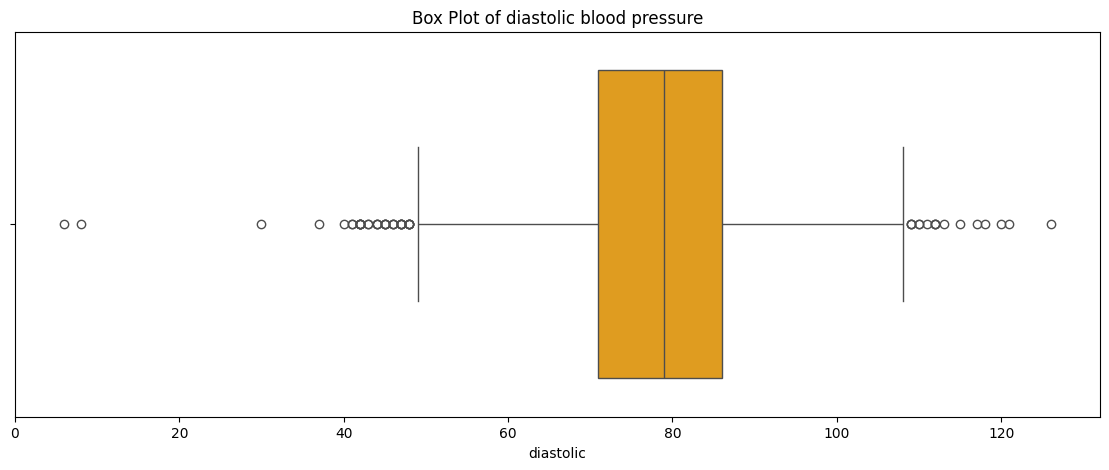

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=df4, x="diastolic", color='orange')
plt.title('Box Plot of diastolic blood pressure')
plt.xlabel('diastolic')

# Show the plot
plt.show()

In [ ]:
# Records where diastolic is less than 20
print(df4[df4['diastolic'] < 20])

       age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
336   35.0      M      173.1      77.60        22.8        8.0     122.0   
3524  44.0      M      177.0      78.28        22.1        6.0     145.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
336        46.4                     16.7            47.0          216.0     B  
3524       47.4                     10.5            42.0          215.0     B  


Diastolic pressure = 8 mmHg, 6mm. This is highly abnormal. Diastolic pressure below 40 mmHg is critical, and 8 and 6 is extremely low, suggesting a likely data error.

In [ ]:
# Remove records where systolic is less than diastolic
df5 = df4[df4['diastolic'] >= 20]

# Display the cleaned DataFrame
print(df5)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm cl

In [ ]:
df5.shape

(13382, 12)

**Correlation Heatmap**

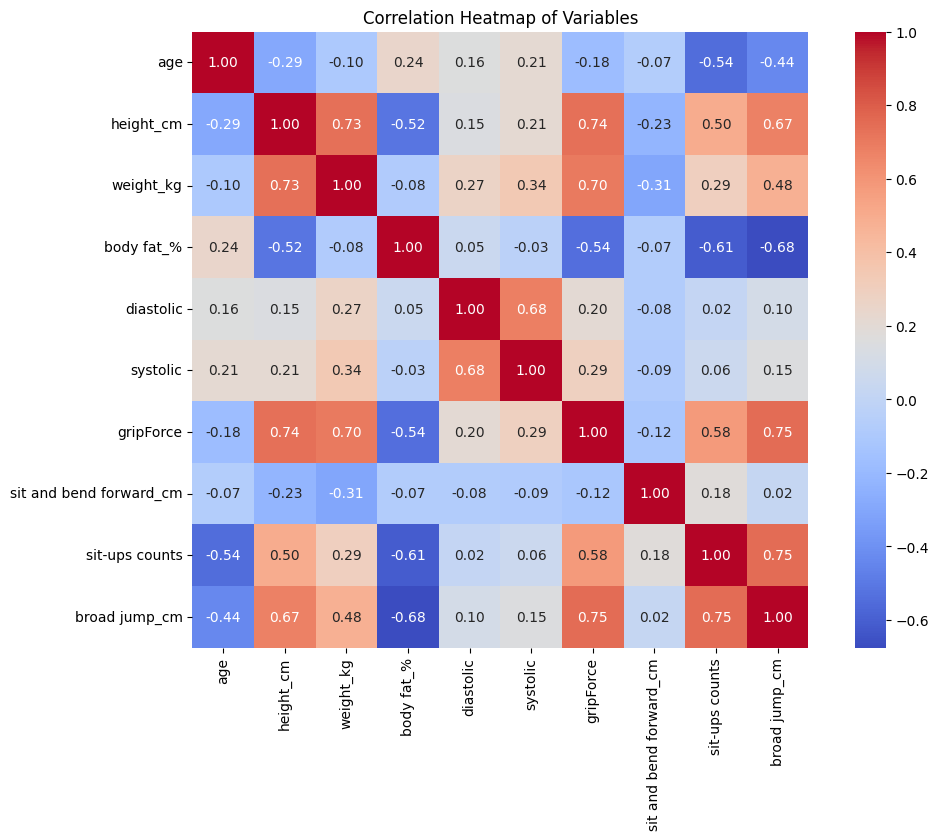

In [ ]:
# Drop the 'gender' and 'class' columns
correlation_data = df5.drop(columns=['gender', 'class'])

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Heatmap of Variables")
plt.show()

# **Feature Engineering**

**Creation of BMI variable**

In [ ]:
# Convert height from cm to meters
df5['height_m'] = df5['height_cm'] / 100

# Calculate BMI and create a new column
df5['bmi'] = df5['weight_kg'] / (df5['height_m'] ** 2)

# Optionally drop the 'height_m' column if you don't need it anymore
df5 = df5.drop(columns=['height_m'])

# Display the updated dataframe
df5.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,bmi
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,25.344179
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,20.495868
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,24.181428
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,23.349562
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,22.412439


**Creation of MAP(Mean Arterial Pressure)**

The Mean Arterial Pressure (MAP) is a derived variable that provides a more comprehensive view of blood pressure over the cardiac cycle. It reflects the average pressure in a person's arteries during one heartbeat, incorporating both SBP and DBP into a single metric.

In [ ]:
# Create a new variable 'map' (Mean Arterial Pressure)
df5['map'] = (df5['systolic'] + 2 * df5['diastolic']) / 3

# Display the updated dataframe
df5.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,bmi,map
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,25.344179,96.666667
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,20.495868,93.333333
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,24.181428,112.000000
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,23.349562,99.666667
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,22.412439,89.000000


# **Splitting to train and test**

In [ ]:
# Select the columns for X and y
X = df5[['age', 'gender', 'body fat_%', 'gripForce', 'sit and bend forward_cm',
         'sit-ups counts', 'broad jump_cm', 'bmi', 'map']]
y = df5['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Descriptive Analysis after Data-preprocessng**

**Class**

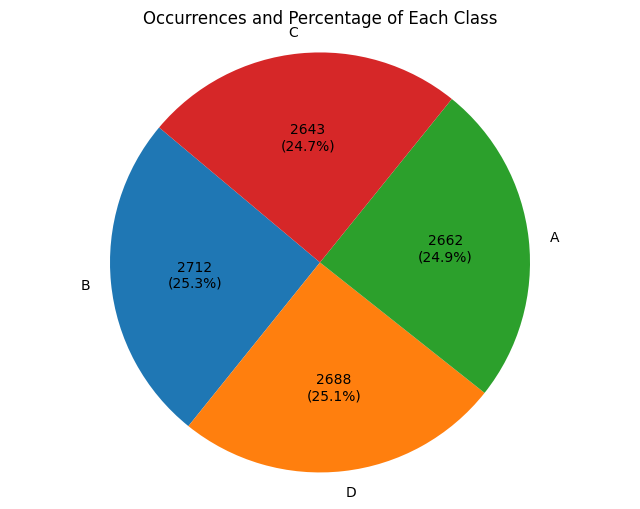

In [ ]:
class_counts = y_train.value_counts()

# Create a function to display both count and percentage
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f'{absolute}\n({pct:.1f}%)'

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct=lambda pct: func(pct, class_counts), startangle=140)
plt.title('Occurrences and Percentage of Each Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

**Gender**

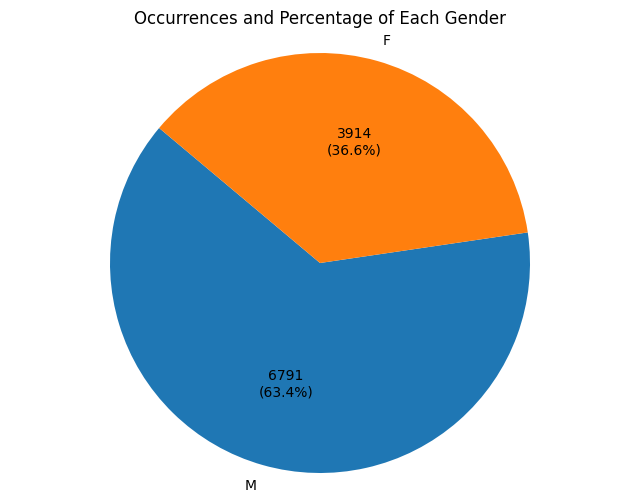

In [ ]:
# Count the number of occurrences for each gender
gender_counts = X_train['gender'].value_counts()

# Create a function to display both count and percentage
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f'{absolute}\n({pct:.1f}%)'

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda pct: func(pct, gender_counts), startangle=140)
plt.title('Occurrences and Percentage of Each Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

**Age**

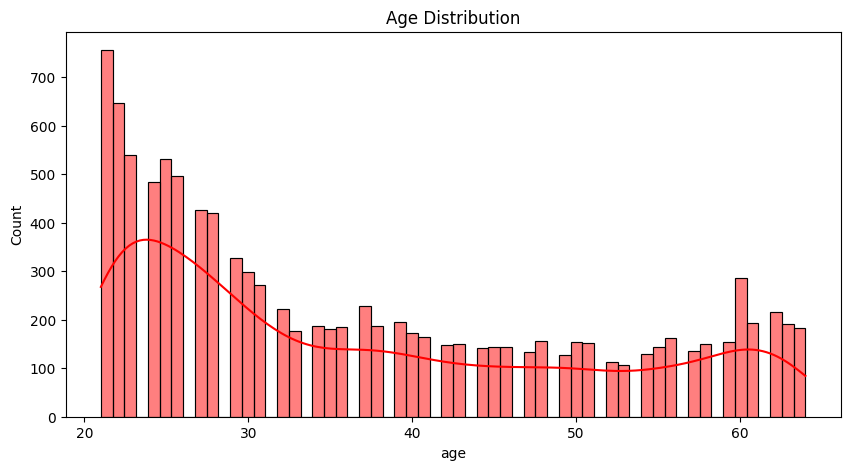

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=X_train, x="age", bins=60, kde=True, color='red')
plt.title("Age Distribution")
plt.show()

In [ ]:
# Calculate min, max, and average
age_min = X_train['age'].min()
age_max = X_train['age'].max()
age_mean = X_train['age'].mean()

print(f"Minimum age: {age_min}")
print(f"Maximum age: {age_max}")
print(f"Average age: {age_mean:.2f}")  # rounded to 2 decimal places

Minimum age: 21.0
Maximum age: 64.0
Average age: 36.79


**BMI**

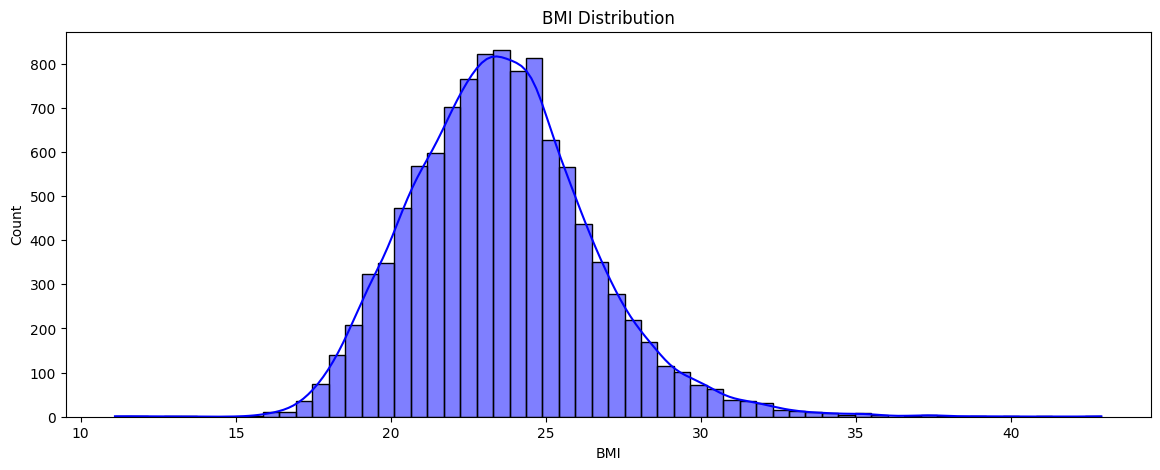

In [ ]:
plt.figure(figsize=(14, 5))
sns.histplot(data=X_train, x="bmi", bins=60, kde=True, color='blue')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.show()

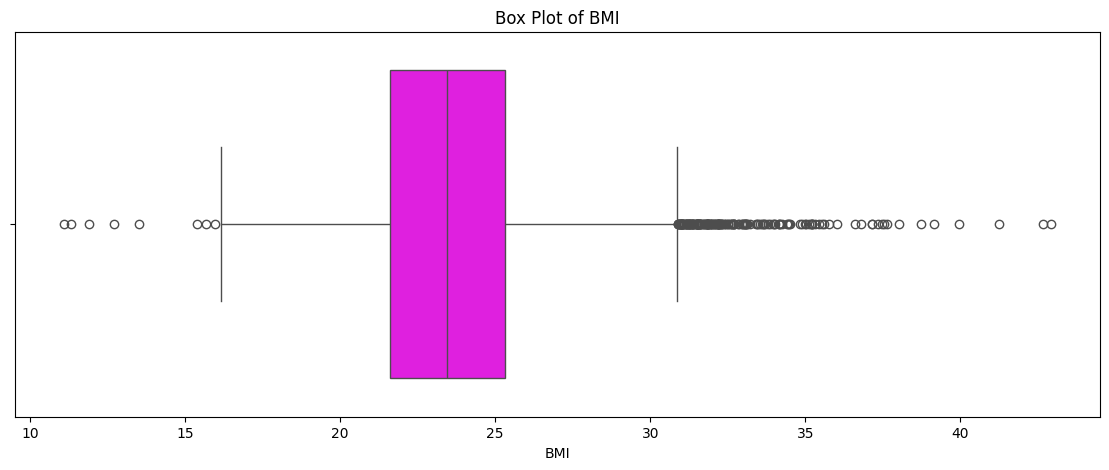

In [ ]:
# Set the figure size for weight
plt.figure(figsize=(14, 5))

# Create a box plot for weight
sns.boxplot(data=X_train, x="bmi", color='magenta')
plt.title('Box Plot of BMI')
plt.xlabel('BMI')

# Show the plot
plt.show()

The standard BMI categories, as defined by the World Health Organization (WHO), are:

Underweight: BMI less than 18.5

Normal weight: BMI between 18.5 and 24.9

Overweight: BMI between 25.0 and 29.9

Obesity (Class I): BMI between 30.0 and 34.9

Obesity (Class II): BMI between 35.0 and 39.9

Obesity (Class III): BMI of 40.0 or higher (also known as severe or morbid obesity)

Someone can have a BMI close to 10, but it would be extremely unhealthy and likely indicate severe malnutrition or an underlying medical condition such as anorexia nervosa, a wasting disease, or other critical health issues.

**Body Fat Percentage**

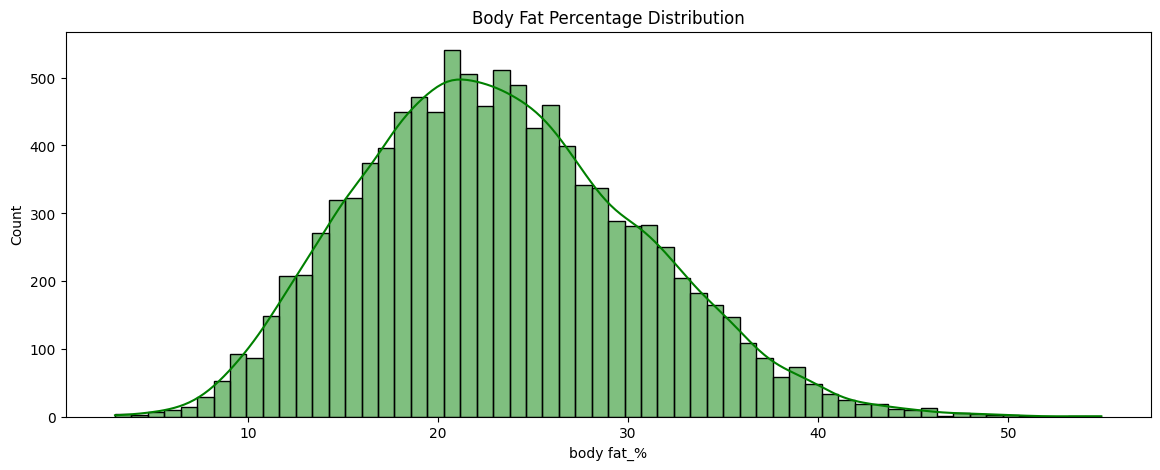

In [ ]:
plt.figure(figsize=(14, 5))
sns.histplot(data=X_train, x="body fat_%", bins=60, kde=True, color='green')
plt.title("Body Fat Percentage Distribution")
plt.show()

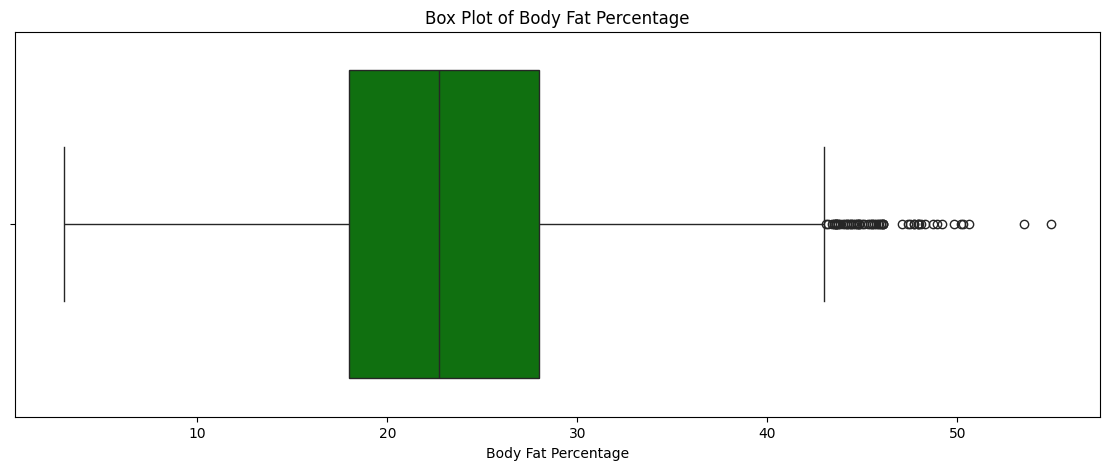

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=X_train, x="body fat_%", color='green')
plt.title('Box Plot of Body Fat Percentage')
plt.xlabel('Body Fat Percentage')

# Show the plot
plt.show()

**Sit and bend forward_cm**

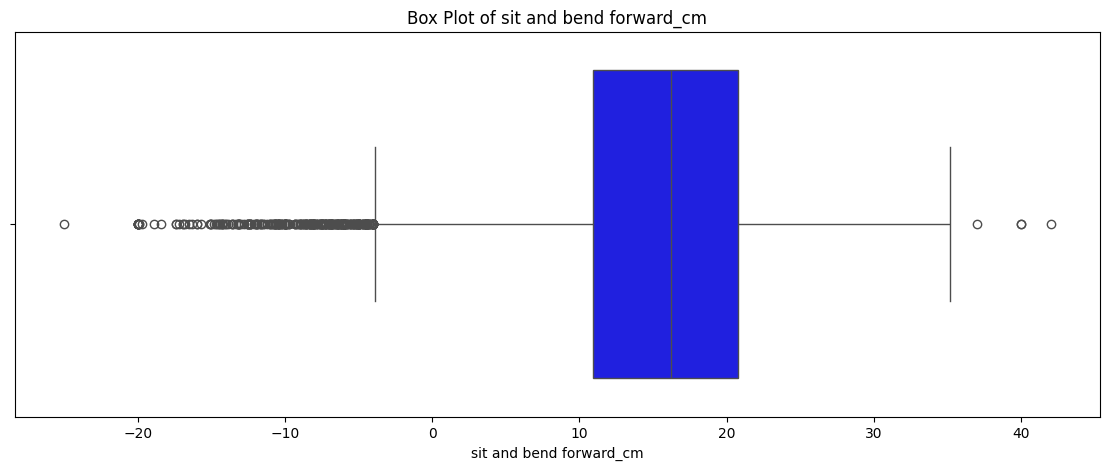

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=X_train, x="sit and bend forward_cm", color='blue')
plt.title('Box Plot of sit and bend forward_cm')
plt.xlabel('sit and bend forward_cm')

# Show the plot
plt.show()

**Broad jump_cm**

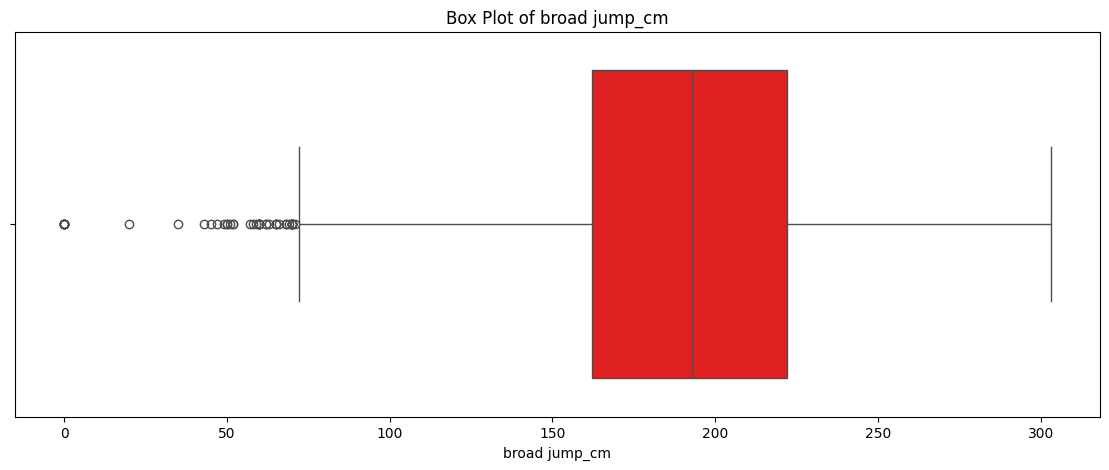

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=X_train, x="broad jump_cm", color='red')
plt.title('Box Plot of broad jump_cm')
plt.xlabel('broad jump_cm')

# Show the plot
plt.show()

**MAP**

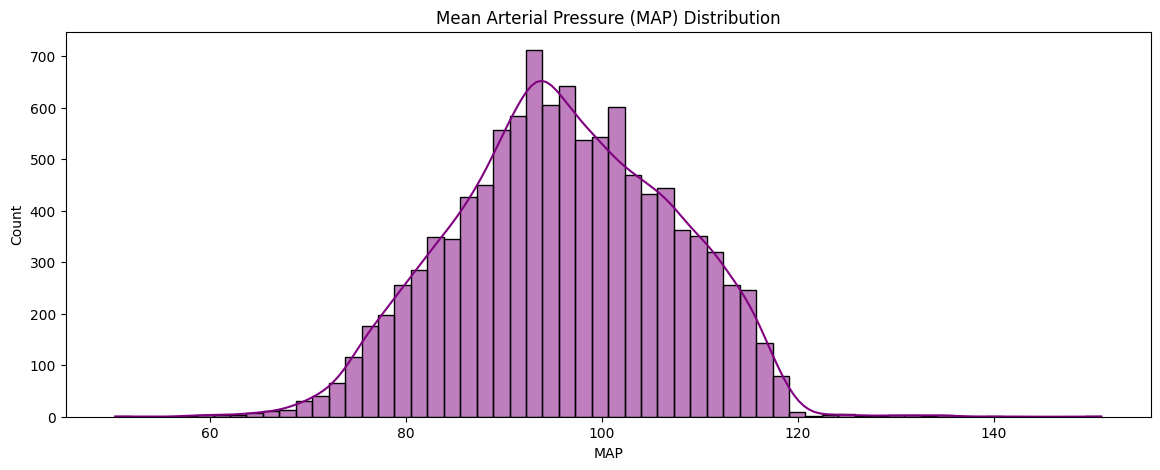

In [ ]:
plt.figure(figsize=(14, 5))
sns.histplot(data=X_train, x="map", bins=60, kde=True, color='purple')
plt.title("Mean Arterial Pressure (MAP) Distribution")
plt.xlabel("MAP")
plt.show()

**Correlation Heatmap**

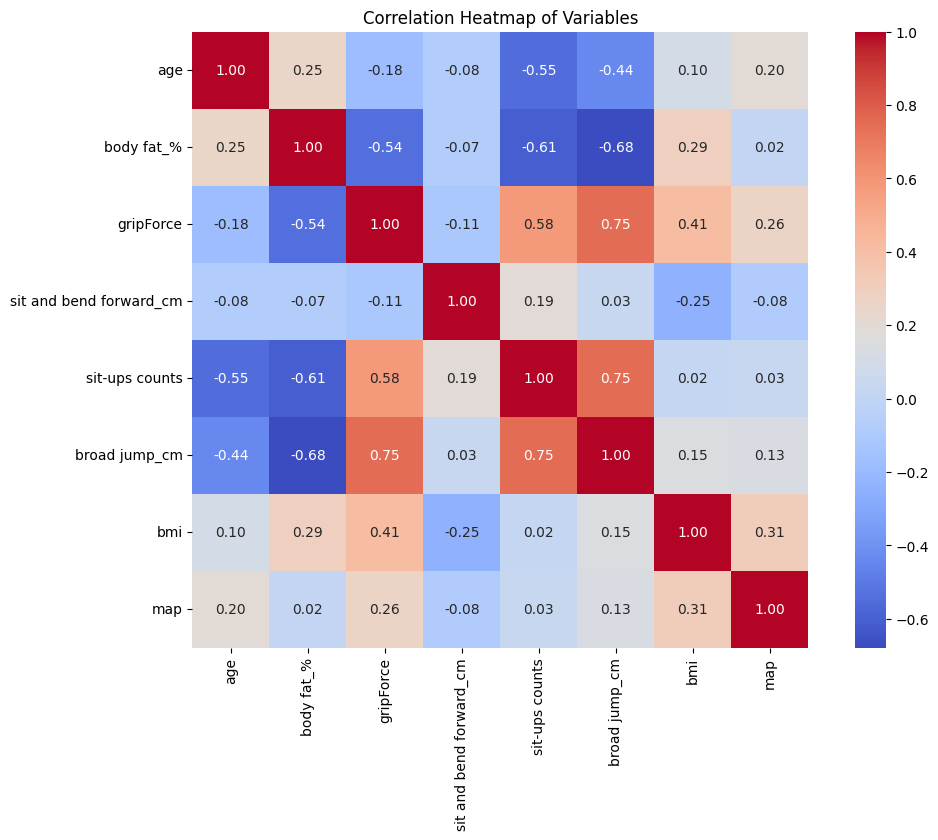

In [ ]:
# Drop the 'gender' and 'class' columns
correlation_data = X_train.drop(columns=['gender'])

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Heatmap of Variables")
plt.show()

**Other graphs**

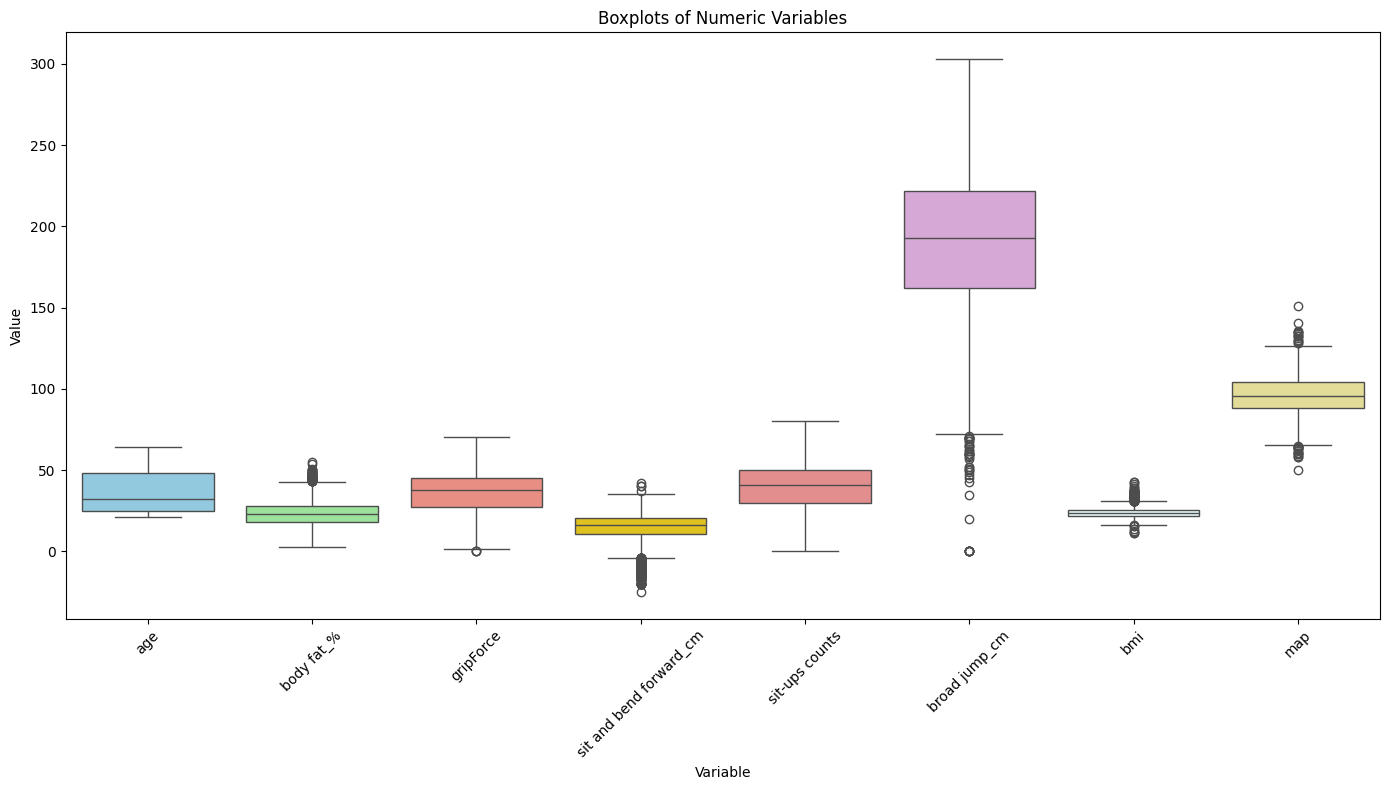

In [ ]:
# Select the relevant columns (excluding specified ones)
columns_to_exclude = ['gender']
selected_columns = X_train.drop(columns=columns_to_exclude)

# Melt the dataframe to long format
melted_df = selected_columns.melt(var_name='Variable', value_name='Value')

# Define custom colors for each variable
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral', 'plum', 'lightcyan', 'khaki']

# Create boxplots with specified colors
plt.figure(figsize=(14, 8))
sns.boxplot(data=melted_df, x='Variable', y='Value', palette=colors)
plt.title('Boxplots of Numeric Variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Bivariate Analysis**

In [ ]:
# Concatenate X_train and y_train for plotting
train_data = pd.concat([X_train, y_train], axis=1)

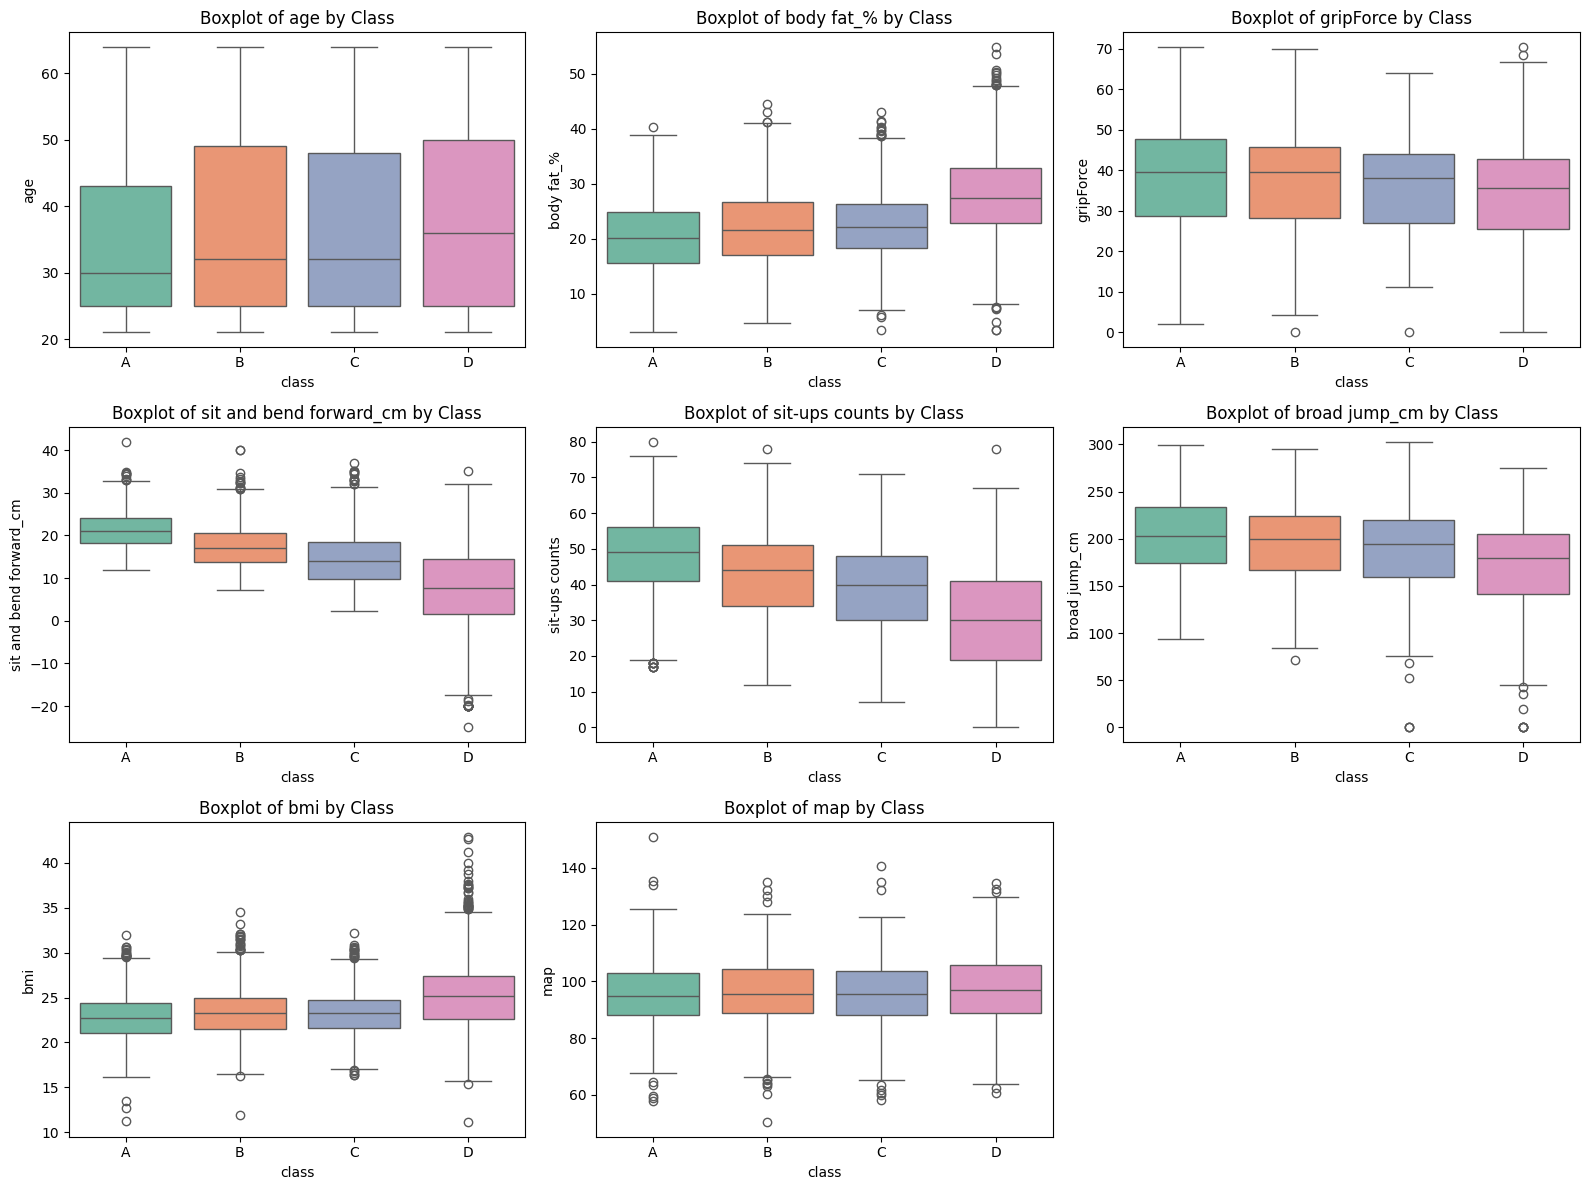

In [ ]:
# Exclude 'gender' column and get the list of numeric columns
columns_to_exclude = ['gender']
numeric_columns = X_train.drop(columns=columns_to_exclude).columns

# Set up the figure for boxplots
plt.figure(figsize=(16, 12))

# Create a boxplot for each numeric variable against 'class'
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot grid as necessary
    sns.boxplot(data=train_data, x='class', y=column, palette='Set2')
    plt.title(f'Boxplot of {column} by Class')

plt.tight_layout()
plt.show()

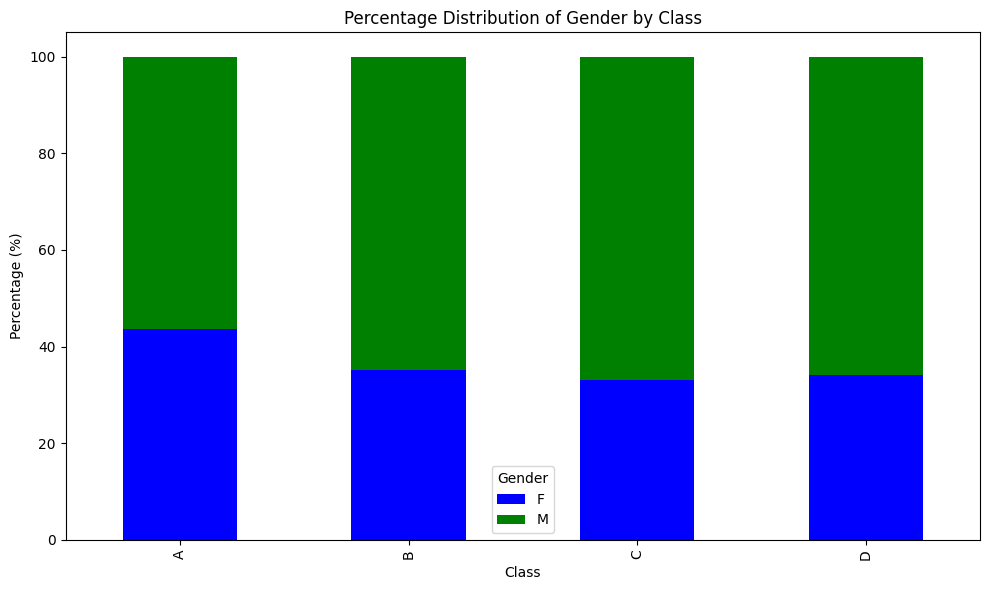

In [ ]:
# Prepare data for percentage stacked bar plot
gender_counts = train_data.groupby(['class', 'gender']).size().unstack(fill_value=0)

# Calculate percentages
percentage_counts = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100

# Plotting
percentage_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'green'])
plt.title('Percentage Distribution of Gender by Class')
plt.xlabel('Class')
plt.ylabel('Percentage (%)')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

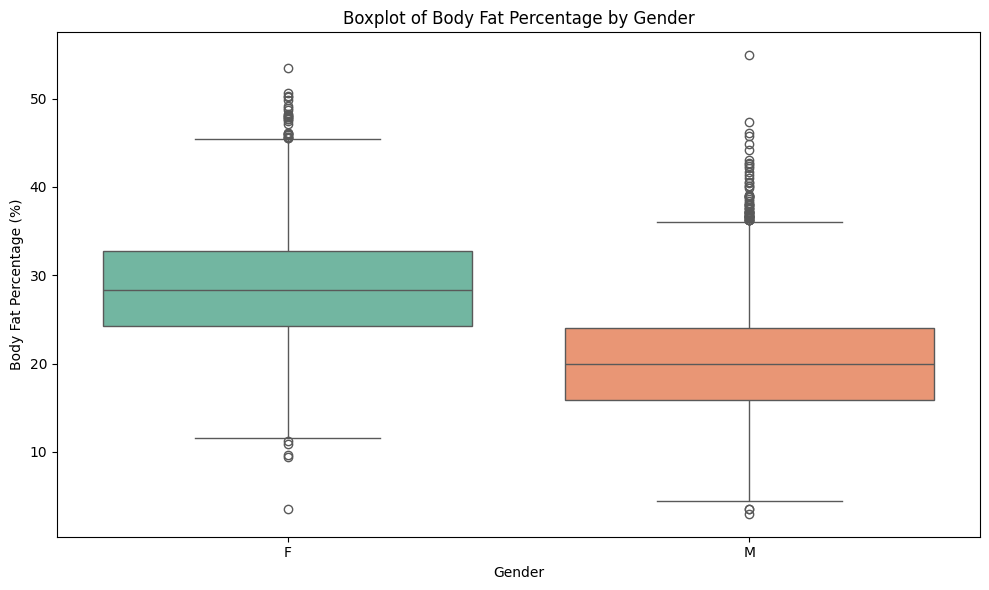

In [ ]:
# Create a boxplot for Body Fat Percentage by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='gender', y='body fat_%', palette='Set2')
plt.title('Boxplot of Body Fat Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Body Fat Percentage (%)')
plt.tight_layout()
plt.show()

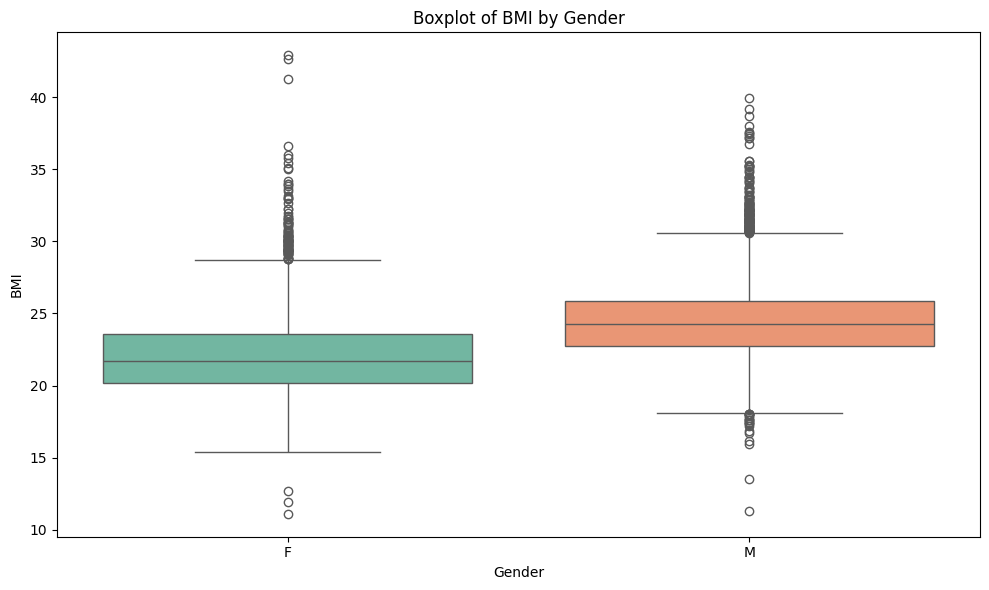

In [ ]:
# Create a boxplot for BMI by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='gender', y='bmi', palette='Set2')
plt.title('Boxplot of BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

**Multi-variate Analysis**

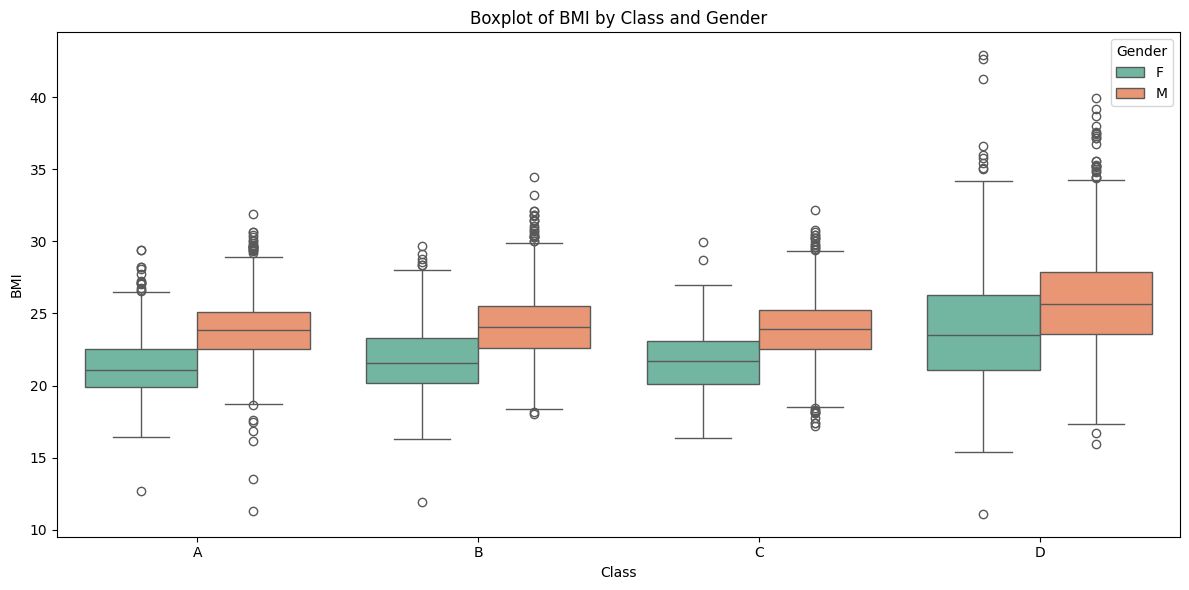

In [ ]:
# Create a boxplot for BMI by class and gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='class', y='bmi', hue='gender', palette='Set2')
plt.title('Boxplot of BMI by Class and Gender')
plt.xlabel('Class')
plt.ylabel('BMI')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

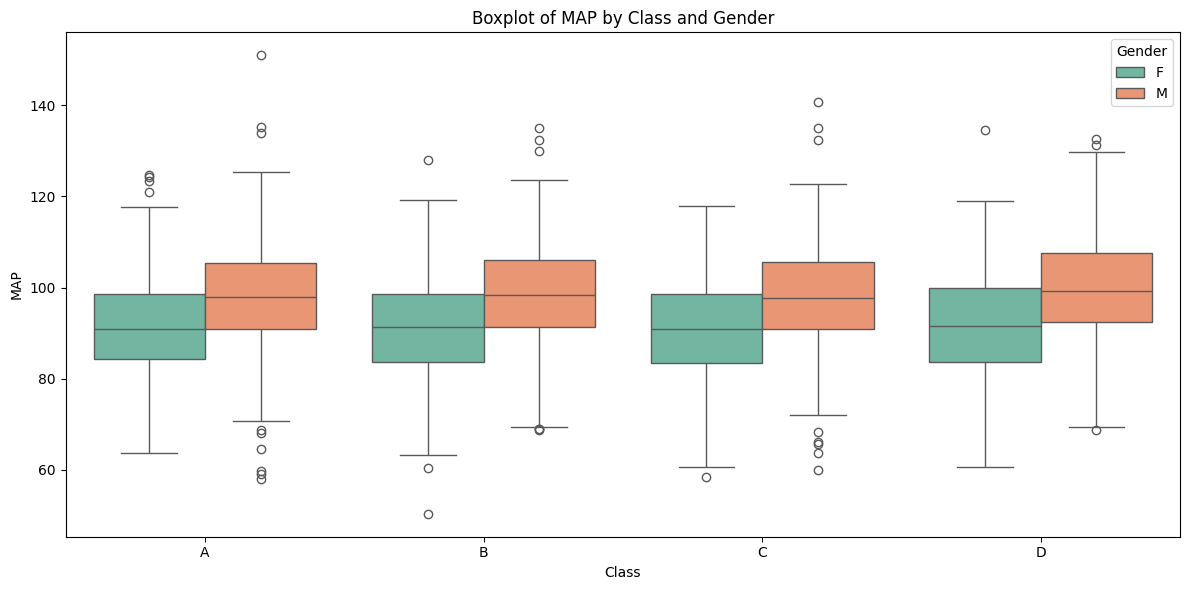

In [ ]:
# Create a boxplot for MAP by class and gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='class', y='map', hue='gender', palette='Set2')
plt.title('Boxplot of MAP by Class and Gender')
plt.xlabel('Class')
plt.ylabel('MAP')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

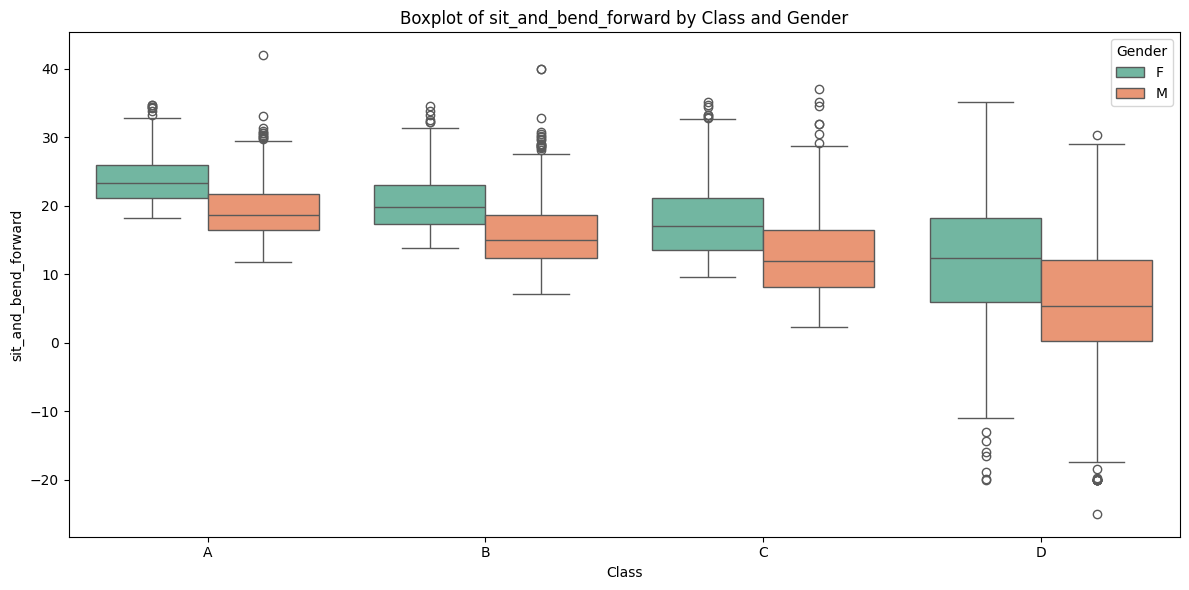

In [ ]:
# Create a boxplot for sit and bend forward by class and gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='class', y='sit and bend forward_cm', hue='gender', palette='Set2')
plt.title('Boxplot of sit_and_bend_forward by Class and Gender')
plt.xlabel('Class')
plt.ylabel('sit_and_bend_forward')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

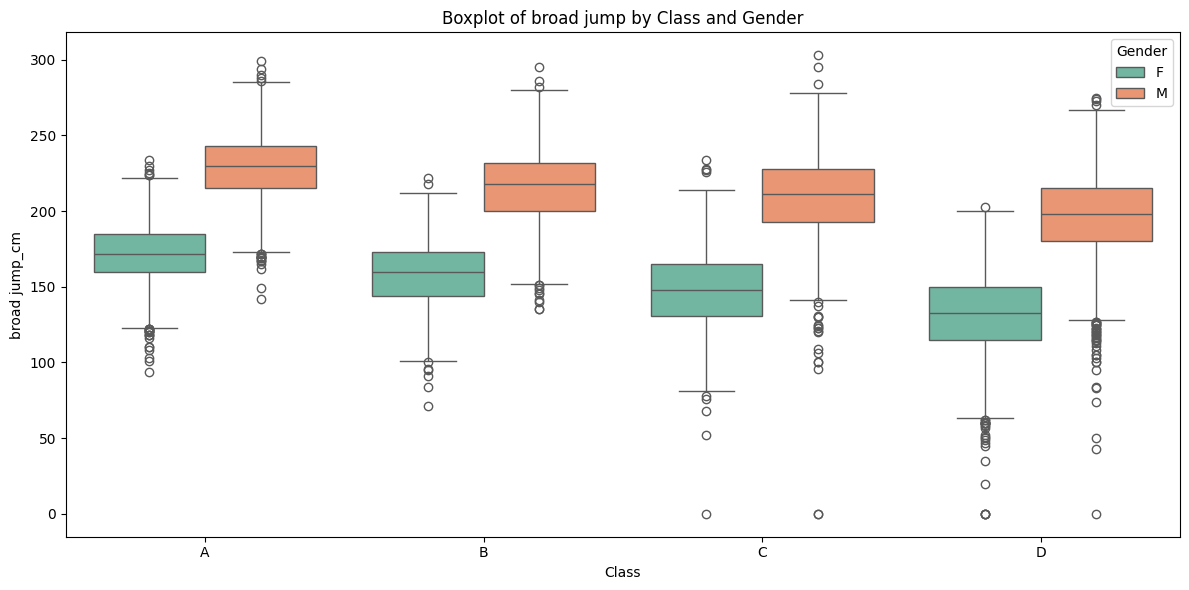

In [ ]:
# Create a boxplot for broad jump by class and gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='class', y='broad jump_cm', hue='gender', palette='Set2')
plt.title('Boxplot of broad jump by Class and Gender')
plt.xlabel('Class')
plt.ylabel('broad jump_cm')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

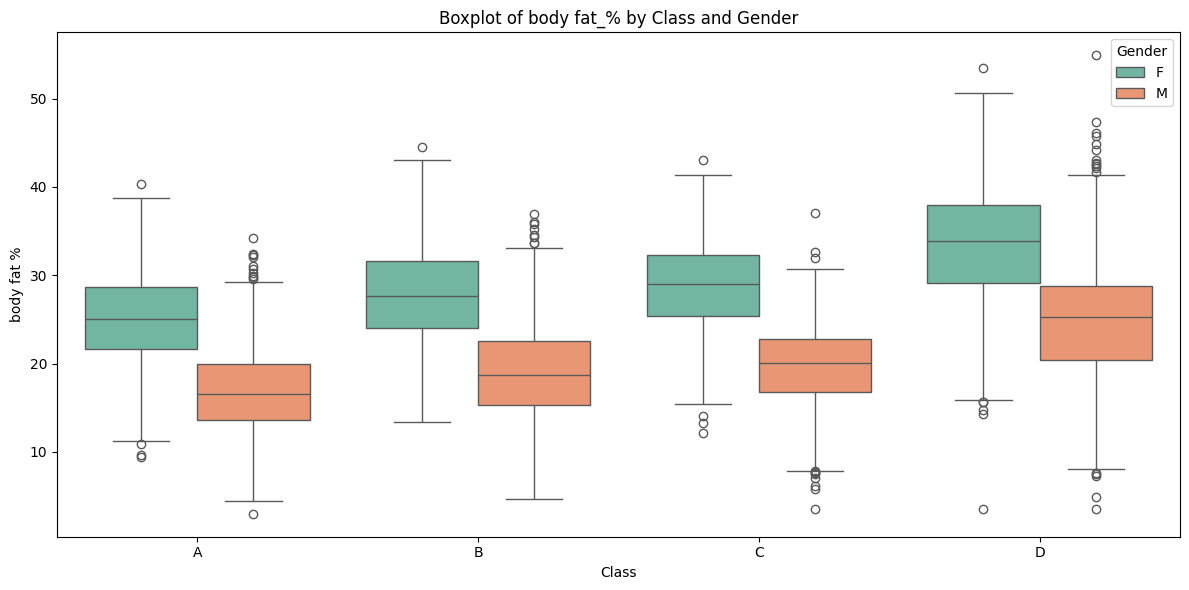

In [ ]:
# Create a boxplot for body_fat by class and gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='class', y='body fat_%', hue='gender', palette='Set2')
plt.title('Boxplot of body fat_% by Class and Gender')
plt.xlabel('Class')
plt.ylabel('body fat %')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

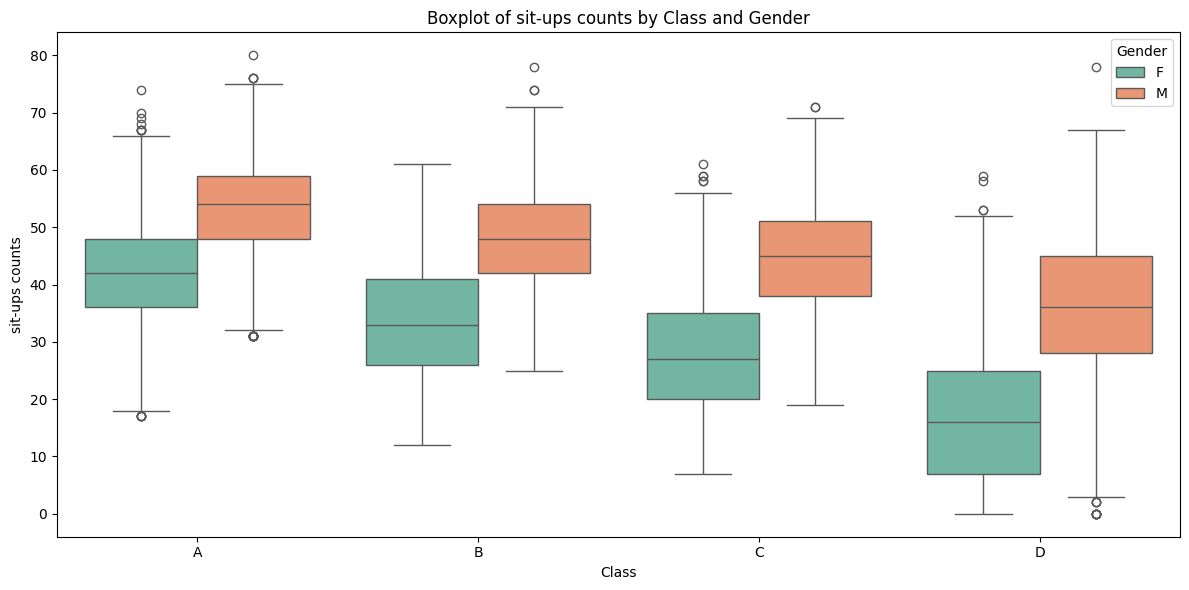

In [ ]:
# Create a boxplot for sit-ups by class and gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='class', y='sit-ups counts', hue='gender', palette='Set2')
plt.title('Boxplot of sit-ups counts by Class and Gender')
plt.xlabel('Class')
plt.ylabel('sit-ups counts')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

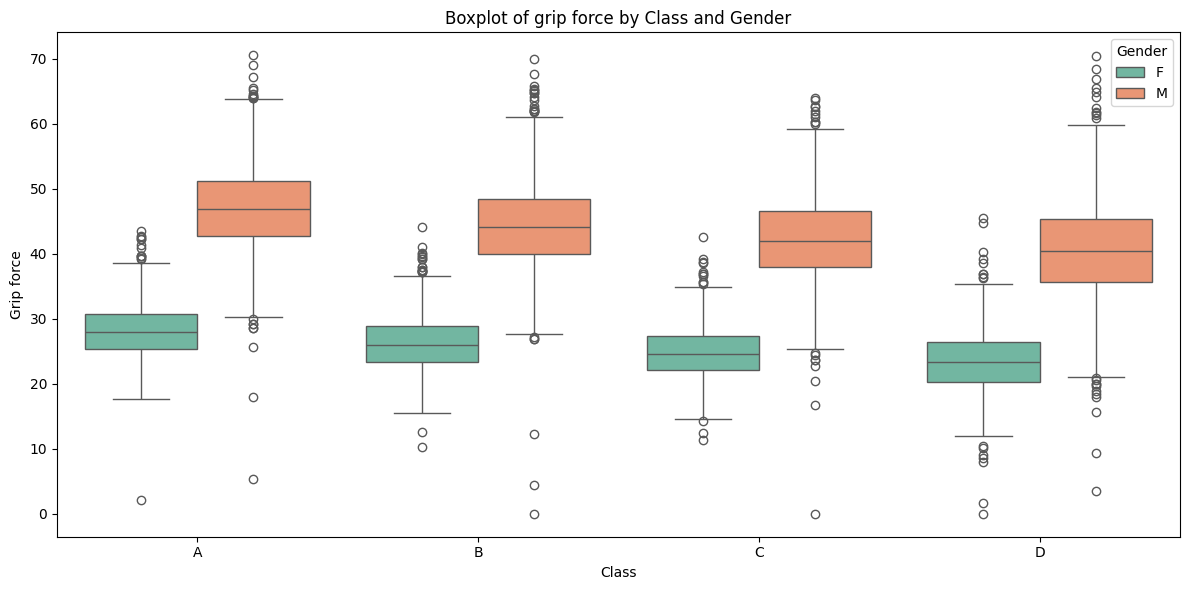

In [ ]:
# Create a boxplot for grip force by class and gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='class', y='gripForce', hue='gender', palette='Set2')
plt.title('Boxplot of grip force by Class and Gender')
plt.xlabel('Class')
plt.ylabel('Grip force')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

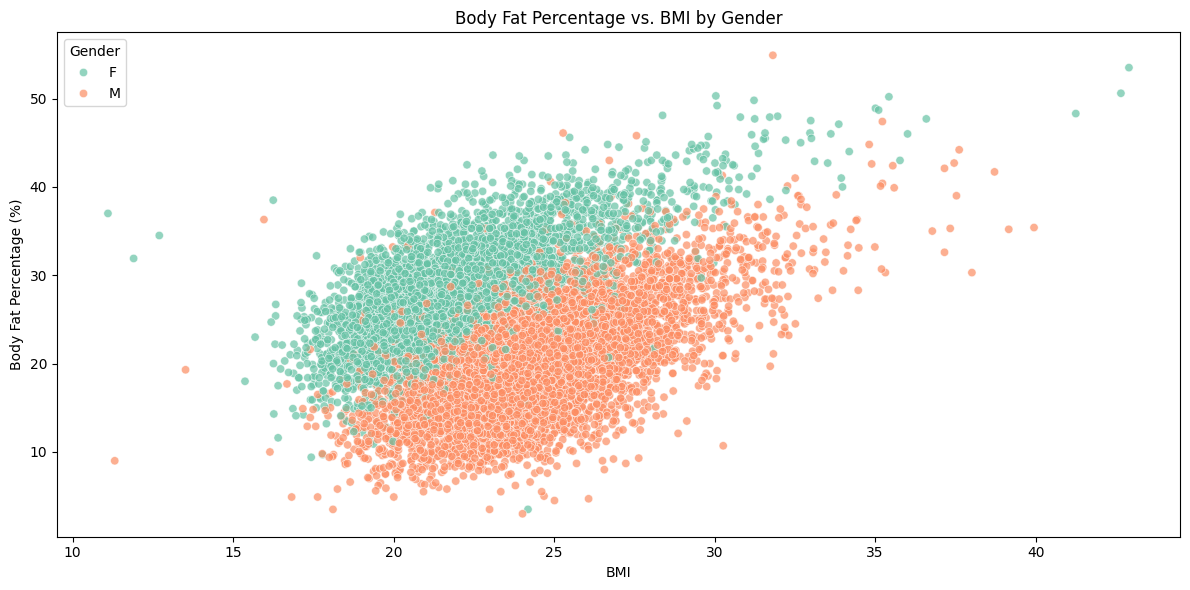

In [ ]:
# Create a scatter plot for Body Fat vs. BMI by Gender
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train_data, x='bmi', y='body fat_%', hue='gender', palette='Set2', alpha=0.7)
plt.title('Body Fat Percentage vs. BMI by Gender')
plt.xlabel('BMI')
plt.ylabel('Body Fat Percentage (%)')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()